<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/CityPersonDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CityPerson Dataset EDA (Exploratory Data Analysis)**
A complete EDA (Exploratory Data Analysis) for CityPerson dataset

## Used Dataset:


*   gtFine_trainvaltest
*   gtFinePanopticParts_trainval

## Step 1: Extract and read the datasets

In [12]:
# Instal Required Libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
# Dataset zip files path from Google Drive
gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'

gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'

In [14]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)

## Dataset Structure:

1.   gtFine_trainvaltest
  *   Contains PNG and JSON files.
  *   Organized by:
       * Train, validation, and test folders.
  *   Files Type:
      * *_color.png: Color-coded images for segmentation.
      * *_instanceIds.png: Encoded image masks where each pedestrian is represented with a unique ID.
      * *_labelIds.png: Encoded image masks for class labels.
      * *_polygons.json: Contains polygonal annotations for semantic segmentation, instance
2. gtFinePanopticParts_trainval:
    * Contains TIF files.
    * Organized similarly to gtFine_trainvaltest.
    * File type:
      * *_gtFinePanopticParts.tif: Panoptic segmentation with part-level annotations (e.g., parts of a pedestrian like arms or legs).

In [15]:
# List the extracted content from both datasets
gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)

gtFine_Files, gtFinepano_Files

(['README', 'license.txt', 'gtFine'],
 ['license.txt', 'README_panopticParts.md', 'gtFinePanopticParts'])

In [16]:
# Path to core folder
gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')

# List driectories inside core folders
gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []

gtFine_Dirs, gtFinePano_Dirs

(['train', 'val', 'test'], ['train', 'val'])

In [17]:
##### SIMPLE IMPLEMENTATION

# # Listing the sample files from the 'train' directory if it exists in both datasets
# gtfine_trainSample = os.listdir(os.path.join(gtFine_CorePath, 'train')) if 'train' in gtFine_Dirs else []
# gtFinePano_trainSample = os.listdir(os.path.join(gtFinePano_CorePath, 'train')) if 'train' in gtFinePano_Dirs else []

# gtFine_Dirs, gtfine_trainSample[:], gtFinePano_Dirs, gtFinePano_trainSample[:]

######

# Define the subdirectories
subdirs = gtFine_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
gtFine_CityFolders = {}
gtFinePano_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []

# Output the first few files for each subdirectory
gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}

gtFine_CityFolders_Preview, gtFinePano_CityFolders_Preview

({'train': ['krefeld',
   'hamburg',
   'strasbourg',
   'erfurt',
   'aachen',
   'bremen',
   'jena',
   'ulm',
   'darmstadt',
   'zurich',
   'weimar',
   'dusseldorf',
   'bochum',
   'stuttgart',
   'tubingen',
   'hanover',
   'monchengladbach',
   'cologne'],
  'val': ['lindau', 'munster', 'frankfurt'],
  'test': ['berlin', 'bonn', 'bielefeld', 'munich', 'leverkusen', 'mainz']},
 {'train': ['krefeld',
   'hamburg',
   'strasbourg',
   'erfurt',
   'aachen',
   'bremen',
   'jena',
   'ulm',
   'darmstadt',
   'zurich',
   'weimar',
   'dusseldorf',
   'bochum',
   'stuttgart',
   'tubingen',
   'hanover',
   'monchengladbach',
   'cologne'],
  'val': ['lindau', 'munster', 'frankfurt'],
  'test': []})

## Files structure

For example: the file structure in the "bochum" city directory confirms the expected dataset formats and relationships:

1. gtFine Dataset (bochum):
    - Files include:
       - Color-coded images (e.g., bochum_000000_000313_gtFine_color.png).
       - Instance masks (e.g., bochum_000000_000313_gtFine_instanceIds.png).
       - Label masks (e.g., bochum_000000_000313_gtFine_labelIds.png).
       - Polygon annotations (e.g., bochum_000000_000313_gtFine_polygons.json).

2. gtFinePanopticParts Dataset (bochum):
    - Files include:
      - Panoptic segmentation with part-level detail (e.g., bochum_000000_000313_gtFinePanopticParts.tif).

## Observed Relationship:
- The filenames match across datasets, indicating alignment.
  - For example: bochum_000000_000313_gtFinePanopticParts.tif aligns with the corresponding files in gtFine for color, instance, label, and polygons.

In [37]:
# Select 3 cities name randomly from 'train' folder to check files
selected_cities = random.sample(gtFine_CityFolders['train'], 3)

# List files for each selected city
gtFine_city_files = {}
gtFinePano_city_files = {}
gtFine_city_files_sorted = {}
gtFinePano_city_files_sorted = {}

for city in selected_cities:
    gtFine_city_path = os.path.join(gtFine_CorePath, "train", city)
    gtFinePano_city_path = os.path.join(gtFinePano_CorePath, "train", city)

    gtFine_city_files[city] = sorted(os.listdir(gtFine_city_path) if os.path.exists(gtFine_city_path) else [])
    gtFinePano_city_files[city] = sorted(os.listdir(gtFinePano_city_path) if os.path.exists(gtFinePano_city_path) else [])

    gtFine_city_files_sorted[city] = gtFine_city_files[city][:4]
    gtFinePano_city_files_sorted[city] = gtFinePano_city_files[city][:1]

# Preview sample files for each city
gtFine_city_files_sorted, gtFinePano_city_files_sorted

({'zurich': ['zurich_000000_000019_gtFine_color.png',
   'zurich_000000_000019_gtFine_instanceIds.png',
   'zurich_000000_000019_gtFine_labelIds.png',
   'zurich_000000_000019_gtFine_polygons.json'],
  'weimar': ['weimar_000000_000019_gtFine_color.png',
   'weimar_000000_000019_gtFine_instanceIds.png',
   'weimar_000000_000019_gtFine_labelIds.png',
   'weimar_000000_000019_gtFine_polygons.json'],
  'erfurt': ['erfurt_000000_000019_gtFine_color.png',
   'erfurt_000000_000019_gtFine_instanceIds.png',
   'erfurt_000000_000019_gtFine_labelIds.png',
   'erfurt_000000_000019_gtFine_polygons.json']},
 {'zurich': ['zurich_000000_000019_gtFinePanopticParts.tif'],
  'weimar': ['weimar_000000_000019_gtFinePanopticParts.tif'],
  'erfurt': ['erfurt_000000_000019_gtFinePanopticParts.tif']})

### Visualize sample images and annotations

The visualization showcases the following:

1. Color Image: A standard RGB image representing the scene.
2. Instance Mask: Encoded segmentation where each pedestrian instance is uniquely labeled.
3. Panoptic Segmentation: A TIF file providing part-level segmentation for pedestrians (e.g., distinguishing arms, legs, etc.).

This confirms the alignment between datasets and their usability for pedestrian detection tasks.

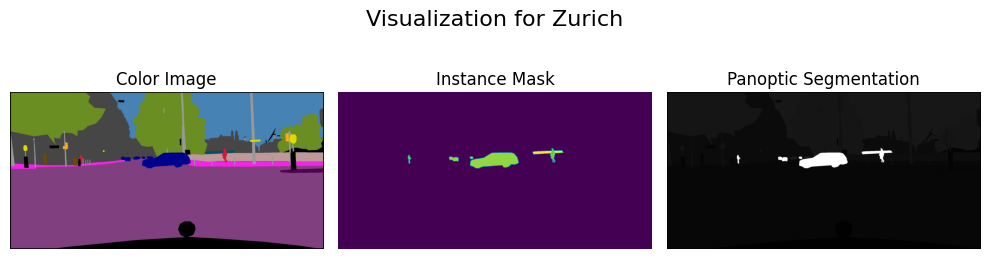

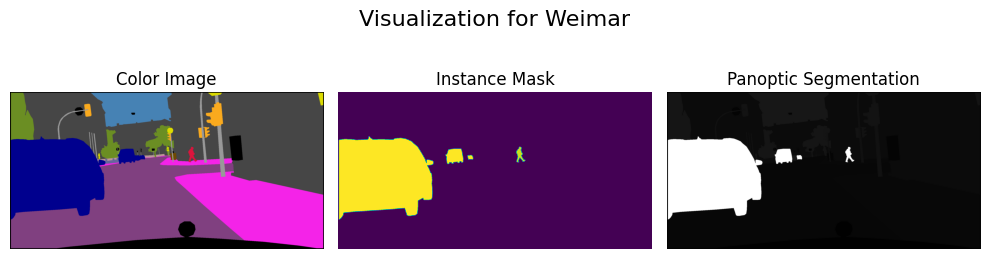

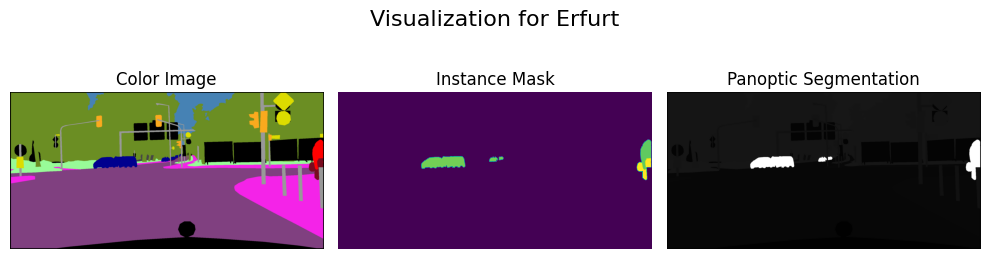

In [42]:
# File paths for sample images from selected cities
for city in selected_cities:
  # Geting files path
  color_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][0]) # '_gtFine_color.png'
  instance_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][1]) # '_gtFine_instanceIds.png'
  panoptic_image_path = os.path.join('/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/', city, gtFinePano_city_files_sorted[city][0]) # '_gtFinePanopticParts.tif'

  # Loading images
  color_image = Image.open(color_image_path)
  instance_image = Image.open(instance_image_path)
  panoptic_image = Image.open(panoptic_image_path)

  # Display the images
  fig, axs = plt.subplots(1, 3, figsize=(10, 3))
  fig.suptitle(f"Visualization for {city.capitalize()}", fontsize=16)

  axs[0].imshow(color_image)
  axs[0].set_title('Color Image')
  axs[0].axis('off')

  axs[1].imshow(instance_image, cmap='viridis')
  axs[1].set_title('Instance Mask')
  axs[1].axis('off')

  axs[2].imshow(panoptic_image, cmap='viridis')
  axs[2].set_title('Panoptic Segmentation')
  axs[2].axis('off')

  plt.tight_layout()
  plt.show()